In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_by_artist = pd.read_csv('/content/drive/MyDrive/project/DATA SET/data_by_artist.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_by_artist

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11


In [ ]:
new_data_by_artist=data_by_artist.drop(['artists'], axis=1)

In [ ]:
new_data_by_artist

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,1,2,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10
28676,0,2,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9
28677,1,11,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5
28678,1,2,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11


In [ ]:
song_features=new_data_by_artist[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']]

In [ ]:
song_features

,acousticness,danceability,energy,instrumentalness,liveness,valence
0,0.590111,0.467222,0.394003,0.011400,0.290833,0.389500
1,0.862538,0.441731,0.406808,0.081158,0.315215,0.268865
2,0.856571,0.348286,0.286571,0.024593,0.325786,0.354857
3,0.884926,0.425074,0.245770,0.073587,0.275481,0.372030
4,0.510714,0.467143,0.488286,0.009400,0.195000,0.482286
...,...,...,...,...,...,...
28675,0.512000,0.356000,0.306000,0.008970,0.108000,0.328000
28676,0.541000,0.578000,0.334000,0.000006,0.067500,0.243000
28677,0.785455,0.570818,0.148400,0.000083,0.142191,0.741273
28678,0.381000,0.353000,0.686000,0.000000,0.056800,0.352000


In [ ]:
song_features.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
song_features.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
28675    False
28676    False
28677    False
28678    False
28679    False
Length: 28680, dtype: bool

In [ ]:
song_features.duplicated(subset = [	'acousticness',	'danceability','energy','instrumentalness','liveness','valence'])

0        False
1        False
2        False
3        False
4        False
         ...  
28675    False
28676    False
28677    False
28678    False
28679    False
Length: 28680, dtype: bool

In [ ]:
new_song_features_data=song_features.drop_duplicates(subset=['acousticness',	'danceability','energy','instrumentalness','liveness','valence'])

In [ ]:
new_song_features_data

,acousticness,danceability,energy,instrumentalness,liveness,valence
0,0.590111,0.467222,0.394003,0.011400,0.290833,0.389500
1,0.862538,0.441731,0.406808,0.081158,0.315215,0.268865
2,0.856571,0.348286,0.286571,0.024593,0.325786,0.354857
3,0.884926,0.425074,0.245770,0.073587,0.275481,0.372030
4,0.510714,0.467143,0.488286,0.009400,0.195000,0.482286
...,...,...,...,...,...,...
28675,0.512000,0.356000,0.306000,0.008970,0.108000,0.328000
28676,0.541000,0.578000,0.334000,0.000006,0.067500,0.243000
28677,0.785455,0.570818,0.148400,0.000083,0.142191,0.741273
28678,0.381000,0.353000,0.686000,0.000000,0.056800,0.352000


In [ ]:
new_song_features_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 28679
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      26392 non-null  float64
 1   danceability      26392 non-null  float64
 2   energy            26392 non-null  float64
 3   instrumentalness  26392 non-null  float64
 4   liveness          26392 non-null  float64
 5   valence           26392 non-null  float64
dtypes: float64(6)
memory usage: 1.4 MB


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
new_song_features_data = make_blobs(n_samples=200,
                                   centers=4,
                                   n_features=2,
                                   cluster_std=1.6,
                                   random_state=50)

In [ ]:
new_song_features_data

(array([[-1.06705283e+00,  9.24306355e+00],
        [ 1.08654318e+00, -6.94815805e+00],
        [-2.30970265e+00,  5.84969440e+00],
        [-1.59728965e+00,  8.45369045e+00],
        [-5.79816711e+00, -3.78405528e+00],
        [-2.29833776e+00, -4.66005371e+00],
        [-1.68210799e+00,  1.12843423e+01],
        [-7.38296450e-01, -5.20135260e+00],
        [-1.92048345e-01, -6.45318764e+00],
        [-6.37920287e+00, -2.17672355e+00],
        [-5.12054803e+00, -2.91449176e+00],
        [-4.22297649e+00,  9.04719945e+00],
        [-2.67815731e+00, -2.32828819e+00],
        [-3.02994109e+00,  1.86959382e+00],
        [-5.73938121e+00, -7.25648845e-01],
        [-1.99427571e+00,  4.28616868e+00],
        [-2.89522086e+00,  1.10222354e+01],
        [-1.11286937e+00,  1.03086380e+01],
        [-5.19987051e+00, -1.59879364e+00],
        [-4.75916597e+00, -1.97047767e+00],
        [-6.76865308e+00, -3.56907573e+00],
        [-2.65715781e+00,  3.33763714e+00],
        [-4.61722463e+00,  1.063

In [ ]:
points=new_song_features_data[0]

In [ ]:
kmeans=KMeans(n_clusters=4)

In [ ]:
kmeans.fit(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

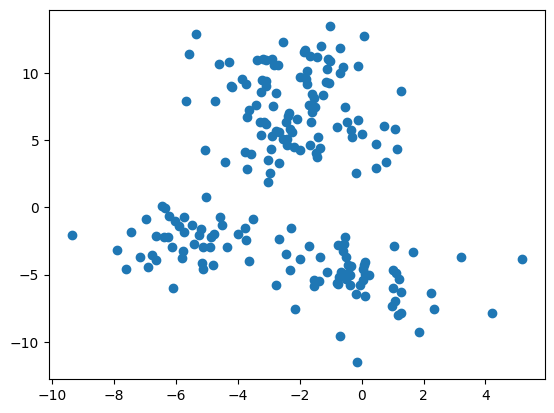

In [ ]:
plt.scatter(new_song_features_data[0][:,0],new_song_features_data[0][:,1])

In [ ]:
clusters=kmeans.cluster_centers_

In [ ]:
print(clusters)

[[ 0.05161133 -5.35489826]
 [-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]
 [-1.92101646  5.21673484]]


In [ ]:
y_km=kmeans.fit_predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


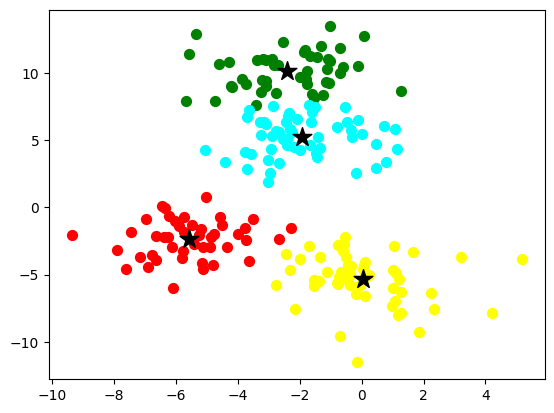

In [ ]:
plt.scatter(points[y_km ==0,0],points[y_km==0,1],s=50,color='red')
plt.scatter(points[y_km ==1,0],points[y_km==1,1],s=50,color='green')
plt.scatter(points[y_km ==2,0],points[y_km==2,1],s=50,color='yellow')
plt.scatter(points[y_km ==3,0],points[y_km==3,1],s=50,color='cyan')

plt.scatter(clusters[0][0],clusters[0][1],marker='*',s=200,color='black')
plt.scatter(clusters[1][0],clusters[1][1],marker='*',s=200,color='black')
plt.scatter(clusters[2][0],clusters[2][1],marker='*',s=200,color='black')
plt.scatter(clusters[3][0],clusters[3][1],marker='*',s=200,color='black')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(song_features)

In [ ]:
pca = PCA()
pca.fit(data_scaled)

PCA()

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.43674913 0.17952282 0.16284527 0.12985558 0.06584526 0.02518194]


In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


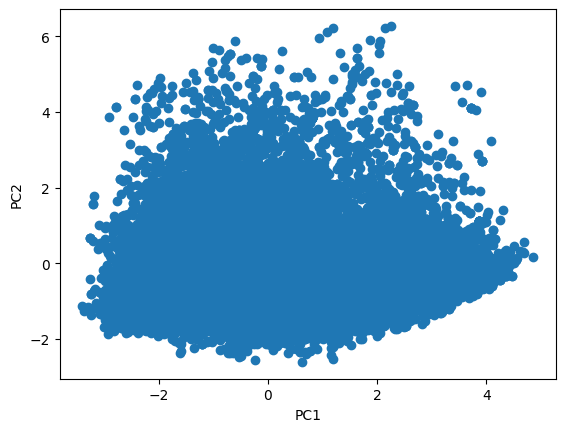

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [ ]:
pca = PCA(n_components=2)
music_pca = pca.fit_transform(data_pca)

In [ ]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(music_pca)

NearestNeighbors(metric='cosine')

In [ ]:
def recommend_items_for_person(person_id,y_km):
  recommendation_list=[]
  category=y_km[person_id]
  for j,i in enumerate(y_km):
    if i==category:
      recommendation_list.append(j)
  return recommendation_list




In [ ]:
l=recommend_items_for_person(34,y_km)
l

[1,
 5,
 7,
 8,
 27,
 33,
 34,
 44,
 45,
 50,
 56,
 60,
 61,
 63,
 64,
 66,
 70,
 73,
 79,
 87,
 90,
 92,
 96,
 98,
 101,
 105,
 107,
 110,
 119,
 124,
 129,
 131,
 132,
 136,
 143,
 146,
 148,
 153,
 154,
 157,
 158,
 159,
 162,
 163,
 168,
 169,
 170,
 171,
 174,
 177,
 180,
 185,
 189,
 194]